### CNN
- 특징 검출(convolution 필터의 계수를 찾아내는) 부분과 찾은 특징을 가지고 분류를 하는 영역으로 구분
- https://excelsior-cjh.tistory.com/79 참고
- https://davinci-ai.tistory.com/29 참고


![](2024-01-30-17-50-06.png)

![](2024-01-30-17-54-34.png)

### 풀링

![](2024-01-30-17-56-56.png), ![](2024-01-30-17-57-33.png)

### 패딩(padding)
- padding = 'same' 설정

![](2024-01-30-18-09-04.png)

### Dropout
- 융통성 혹은 과적합 방지

![](2024-01-30-18-13-49.png), ![](2024-01-30-18-14-08.png), ![](2024-01-30-18-14-25.png)

In [4]:
from tensorflow.keras import datasets

mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
# 각 픽셀의 255값이 최댓값이므로 0~1 사이의 값으로 조정(일종의 min-max scaler)

X_train = X_train.reshape((60000, 28, 28, 1))
                            # 채널때문에 3차원(28, 28, 1)으로 정의
X_test = X_test.reshape((10000, 28, 28, 1))
                            # 채널때문에 3차원(28, 28, 1)으로 정의

In [5]:
from tensorflow.keras import layers, models

### 모델

In [6]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size = (5, 5), strides= (1, 1),
                  # 32: 32개의 채널을 통해 32개의 특징을 찾도록 하고
                  # kernel_size = (5, 5) : 필터(=커널)는 5x5 크기로 잡고, 
                  # strides= (1, 1) : 설정된 필터를 1칸씩 띄어서 이동시키겠다
                  padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
                  # padding = 'same' : zero padding
                  # activation = 'relu' : activation 함수는 relu 사용
                  # input_shape = (28, 28, 1) : 채널이 3차원(28, 28, 32)이기 때문에 input_shape도 3차원으로 설정
    layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),
                    # pool_size = (2, 2) : 풀링 사이즈는 2x2 크기로 설정하고 
                    # strides = (2, 2) : 풀링을 2칸씩 띄어서 이동시키겠다
    layers.Conv2D(64, (2, 2), activation = 'relu', padding = 'same'),
    layers.MaxPooling2D(pool_size = (2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    # Flatten() : CNN에서 컨볼루션 레이어와 풀링 레이어를 반복적으로 거치면 주요 특징만 추출됩니다. 
    # 추출된 주요 특징은 2차원 데이터로 이루어져 있지만, Dense와 같이 분류를 위한 학습 레이어에서는 1차원 데이터로 바꾸어서 학습이 되어야 합니다.
    # 2차원 데이터를 1차원 데이터로 바꾸는 역할의 레이어입니다.
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

![](2024-01-30-17-35-10.png)

### 학습

In [7]:
import time

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
            # one-hot-encoding을 해줘야되지만 loss함수를 sparse_categorical_crossentropy로 설정하면 같은 효과
              metrics = 'accuracy')

start_time = time.time()
hist = model.fit(X_train, y_train, epochs = 5, verbose = 1,
                 validation_data = (X_test, y_test))
                # accuracy를 알아야되므로 validation_data를 설정해 줘야하며 데이터가 오염되지는 않는다
print('Fit time :', time.time() - start_time)


Epoch 1/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1129 - accuracy: 0.9646 - val_loss: 0.0560 - val_accuracy: 0.9810
Epoch 2/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0459 - accuracy: 0.9851 - val_loss: 0.0447 - val_accuracy: 0.9852
Epoch 3/5
1875/1875 [==============================] - 131s 70ms/step - loss: 0.0327 - accuracy: 0.9897 - val_loss: 0.0444 - val_accuracy: 0.9862
Epoch 4/5
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0253 - accuracy: 0.9919 - val_loss: 0.0374 - val_accuracy: 0.9882
Epoch 5/5
1875/1875 [==============================] - 100s 53ms/step - loss: 0.0203 - accuracy: 0.9934 - val_loss: 0.0259 - val_accuracy: 0.9920
Fit time : 458.3934578895569


### acc와 loss

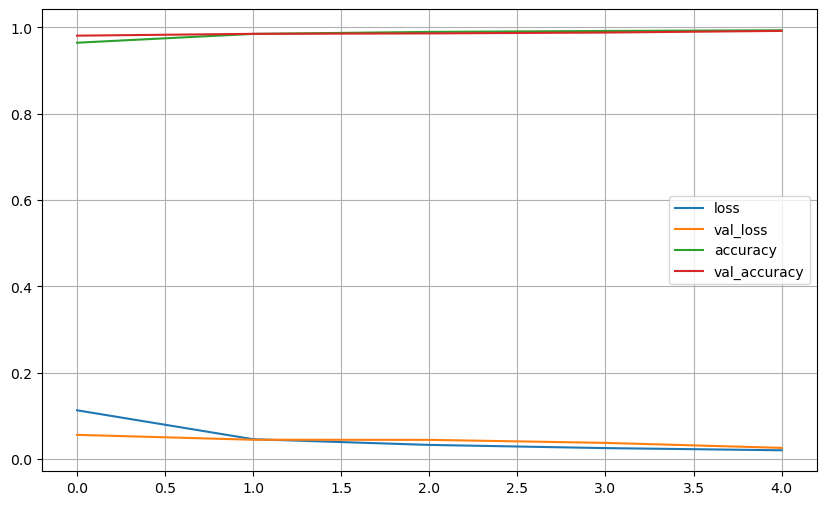

In [8]:
import matplotlib.pyplot as plt

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(10, 6))

for each in plot_target:
    plt.plot(hist.history[each], label = each)

plt.legend()
plt.grid()
plt.show()

In [9]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0259 - accuracy: 0.9920
Test loss : 0.025850525125861168
Test accuracy : 0.9919999837875366


### 틀린데이터 확인 및 시각화

In [10]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis = 1)
predicted_labels[:10]

313/313 [==============================] - 2s 6ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [11]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [12]:
worng_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        worng_result.append(n)

len(worng_result)

80

In [13]:
import random

samples = random.choices(population=worng_result, k=16)
samples

[9024,
 4176,
 1878,
 8408,
 4571,
 4360,
 8408,
 1709,
 8408,
 659,
 1226,
 4807,
 4360,
 2896,
 9642,
 2574]

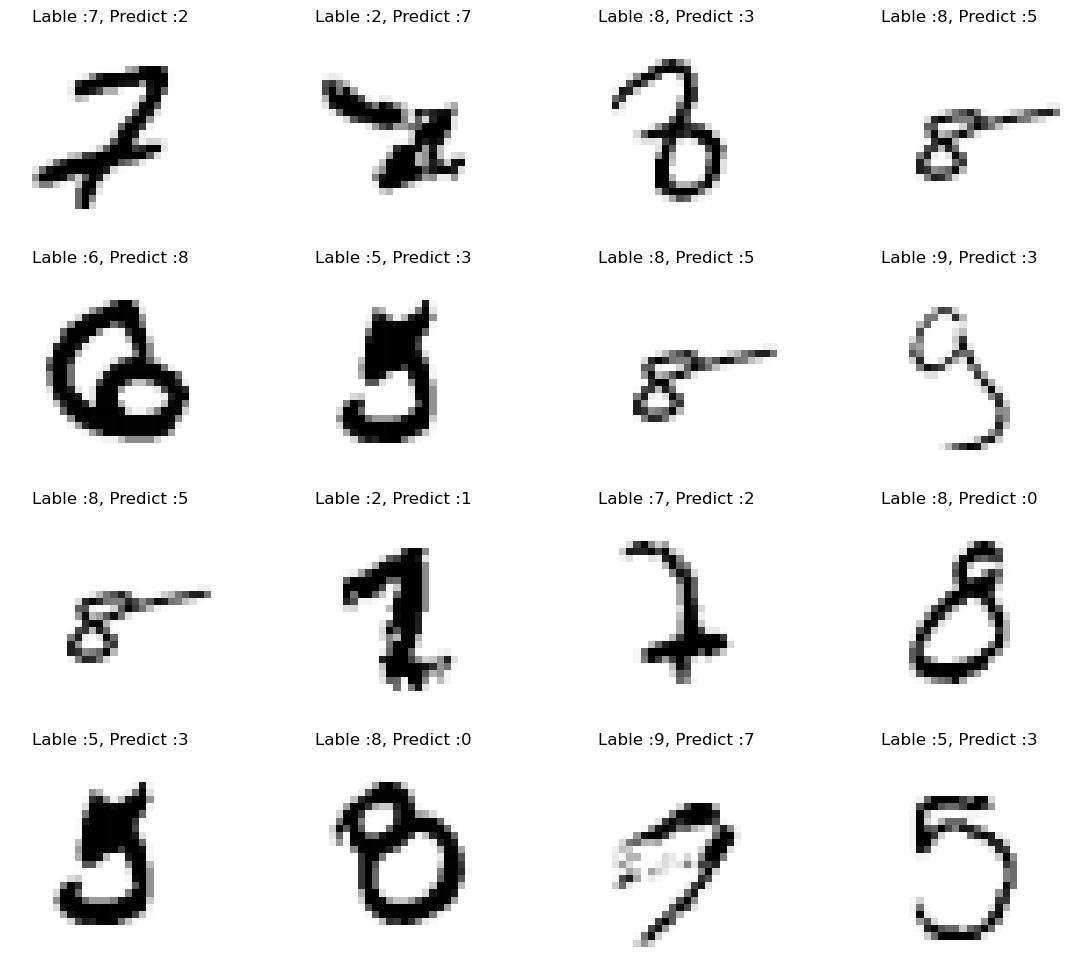

In [15]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.title('Lable :' + str(y_test[n]) + ', ' + 'Predict :' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

### 모델 저장

In [16]:
model.save('MNIST_CNN_model.h5')

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
